# 0112_과제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## 1. feature 갯수를 10, 5, 2로 차원 축소하기

In [4]:
# 표준 스케일러로 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [5]:
# 차원 축소하기
from sklearn.decomposition import PCA

pca10 = PCA(n_components=10)
pca5 = PCA(n_components=5)
pca2 = PCA(n_components=2)

In [6]:
# fit_transform 시키기
cancer_pca10 = pca10.fit_transform(cancer_std)
cancer_pca5 = pca5.fit_transform(cancer_std)
cancer_pca2 = pca2.fit_transform(cancer_std)

In [7]:
cancer_pca_df10 = pd.DataFrame(data=cancer_pca10, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
cancer_pca_df10['target'] = cancer.target

cancer_pca_df10.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398402,-0.157127,-0.877390,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240987,-0.711905,1.106990,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668170,0.097399,0.024037,0.454315,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053421,1.429907,1.059595,-1.405471,-1.116932,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226494,-0.936211,0.636362,-0.263788,0.377683,0


In [8]:
cancer_pca_df5 = pd.DataFrame(data=cancer_pca5, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
cancer_pca_df5['target'] = cancer.target

cancer_pca_df5.head()

,PC1,PC2,PC3,PC4,PC5,target
0,9.192837,1.948583,-1.123166,3.633729,-1.195111,0
1,2.387802,-3.768172,-0.529293,1.118265,0.621776,0
2,5.733896,-1.075174,-0.551748,0.912082,-0.177086,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960880,0
4,3.935302,-1.948072,1.389767,2.940640,0.546747,0


In [9]:
cancer_pca_df2 = pd.DataFrame(data=cancer_pca2, columns=['PC1', 'PC2'])
cancer_pca_df2['target'] = cancer.target

cancer_pca_df2.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


## 2. 각각의 경우 (30, 10, 5, 2)의 성능 측정하기

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# 30
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.3, random_state=2021
)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
score = accuracy_score(y_test, pred)
print(f'feature30 스코어는 {score:.4f}입니다.')

# 10
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca_df10[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']], cancer.target, stratify=cancer.target, test_size=0.3, random_state=2021
)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
score = accuracy_score(y_test, pred)
print(f'feature10 스코어는 {score:.4f}입니다.')

# 5
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca_df5[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']], cancer.target, stratify=cancer.target, test_size=0.3, random_state=2021
)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
score = accuracy_score(y_test, pred)
print(f'feature5 스코어는 {score:.4f}입니다.')

# 2
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca_df2[['PC1', 'PC2']], cancer.target, stratify=cancer.target, test_size=0.3, random_state=2021
)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
score = accuracy_score(y_test, pred)
print(f'feature2 스코어는 {score:.4f}입니다.')

feature30 스코어는 0.9123입니다.
feature10 스코어는 0.9649입니다.
feature5 스코어는 0.9298입니다.
feature2 스코어는 0.9298입니다.


## 3. 2개로 축소한 차원의 시각화 하기

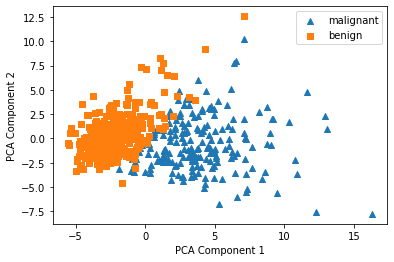

In [12]:
markers=['^', 's']

for i, marker in enumerate(markers):
    x_axis_data = cancer_pca_df2[cancer_pca_df2['target']==i]['PC1']
    y_axis_data = cancer_pca_df2[cancer_pca_df2['target']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 함수를 써서 구하기

In [13]:
def pca_acc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.3, random_state=2021
    )
    dtc = DecisionTreeClassifier(random_state=2021)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    score = accuracy_score(y_test, pred)
    return np.round(score,4)

In [14]:
print('PCA2 정확도:', pca_acc(cancer_pca_df2[['PC1', 'PC2']], cancer.target))
print('PCA5 정확도:', pca_acc(cancer_pca_df5[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']], cancer.target))
print('PCA10 정확도:', pca_acc(cancer_pca_df10[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']], cancer.target))
print('원데이터 정확도:', pca_acc(cancer.data, cancer.target))

PCA2 정확도: 0.9357
PCA5 정확도: 0.9181
PCA10 정확도: 0.9708
원데이터 정확도: 0.9181


### globals(): 전역 변수를 딕셔너리에 담아둔 것을 통하여 더욱 간단하게 코드작성하기

In [15]:
for dim in [2, 5, 10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancerPCA{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)

In [17]:
for dim in [2, 5, 10]:
    acc = pca_acc(globals()[f'cancerPCA{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_acc(cancer_std, cancer.target))

PCA 2 정확도: 0.9357
PCA 5 정확도: 0.9181
PCA 10 정확도: 0.9708
원데이터 정확도: 0.9181


위 두개의 for loop을 하나로 합침

In [18]:
for dim in [2, 5, 10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancerPCA{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc = pca_acc(globals()[f'cancerPCA{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_acc(cancer_std, cancer.target))

PCA 2 정확도: 0.9357
PCA 5 정확도: 0.9181
PCA 10 정확도: 0.9708
원데이터 정확도: 0.9181
